# Data Merging

In [31]:
import os
import glob
import pandas as pd
import calendar
from IPython.display import display
from pandas.api.types import CategoricalDtype

In [32]:
#get the file paths of all the Excel files in the folder
folder_path = '/content/RBI_Prepared_Data'
#get a list of all xlsx files in the folder
excel_files = glob.glob(folder_path + '/*.xlsx')
#sort the excek files list by month and year
order = ['Apr_2022', 'May_2022', 'Jun_2022', 'Jul_2022', 'Aug_2022', 'Sep_2022', 'Oct_2022', 'Nov_2022', 'Dec_2022',
         'Jan_2023', 'Feb_2023', 'Mar_2023']
excel_files = sorted(excel_files, key=lambda x: order.index(x.split('/')[-1].split('.')[0]))
print(excel_files)

['/content/RBI_Prepared_Data/Apr_2022.xlsx', '/content/RBI_Prepared_Data/May_2022.xlsx', '/content/RBI_Prepared_Data/Jun_2022.xlsx', '/content/RBI_Prepared_Data/Jul_2022.xlsx', '/content/RBI_Prepared_Data/Aug_2022.xlsx', '/content/RBI_Prepared_Data/Sep_2022.xlsx', '/content/RBI_Prepared_Data/Oct_2022.xlsx', '/content/RBI_Prepared_Data/Nov_2022.xlsx', '/content/RBI_Prepared_Data/Dec_2022.xlsx', '/content/RBI_Prepared_Data/Jan_2023.xlsx', '/content/RBI_Prepared_Data/Feb_2023.xlsx', '/content/RBI_Prepared_Data/Mar_2023.xlsx']


In [33]:
#initialize an empty list to store the prepared dataframes
frames = []

In [34]:
#loop over each xlsx file
for file in excel_files:

    #extract the month and the year from the name of the file
    file_name = file.split('/')[-1]
    month_year = file_name.split('.')[0]
    month, year = month_year.split('_')

    #read the excel file into a dataframe
    df= pd.read_excel(file)

    #rename columns
    df.rename(columns={'Bank Name': 'bank_name',
                   'Bank Type': 'bank_type',
                   'Credit Cards': 'credit_cards',
                   'Debit Cards': 'debit_cards',
                   'CC Transactions': 'cc_transactions',
                   'CC Inr Value': 'cc_inr_value',
                   'DC Transactions': 'dc_transactions',
                   'DC Inr Value': 'dc_inr_value'}, inplace=True)

    #print first few rows
    display(df.head())
    print(df.shape)

    #add column for month and year
    df['month_year'] = f'{month}_{year}'

    frames.append(df)

#merge data
merged_df = pd.concat(frames)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1194104,75272375,2555872,9.288661e+09,12719853,2.294928e+10
1,BANK OF INDIA,Public,165625,44965718,268651,8.180705e+08,8092268,1.273034e+10
2,BANK OF MAHARASHTRA,Public,77592,12382388,93486,3.810745e+08,4249073,6.098393e+09
3,CANARA BANK,Public,917871,47155319,920892,2.562248e+09,14796245,2.743993e+10
4,CENTRAL BANK OF INDIA,Public,0,30407359,0,0.000000e+00,3516187,7.102464e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1267896,75630687,2954601,1.087133e+10,12868292,2.307537e+10
1,BANK OF INDIA,Public,165929,45256890,277634,8.492350e+08,8092408,1.269866e+10
2,BANK OF MAHARASHTRA,Public,77291,12523886,91537,3.773794e+08,3880688,5.892887e+09
3,CANARA BANK,Public,915470,46959288,956097,2.722424e+09,14503376,2.765761e+10
4,CENTRAL BANK OF INDIA,Public,0,28963920,0,0.000000e+00,3549449,7.050976e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1348264,75993816,2936292,1.151898e+10,11972147,2.129156e+10
1,BANK OF INDIA,Public,169240,45402570,250779,7.815972e+08,7469283,1.156791e+10
2,BANK OF MAHARASHTRA,Public,77017,12651775,83933,3.493896e+08,3464205,5.054377e+09
3,CANARA BANK,Public,922700,46100836,929375,2.667499e+09,13413751,2.506292e+10
4,CENTRAL BANK OF INDIA,Public,0,27038530,0,0.000000e+00,3334277,6.442263e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1416927,76491940,3186932,1.274739e+10,11969658,2.146026e+10
1,BANK OF INDIA,Public,161832,45431685,247491,7.897735e+08,7516774,1.174562e+10
2,BANK OF MAHARASHTRA,Public,76761,12784888,79760,3.287885e+08,3449433,5.072637e+09
3,CANARA BANK,Public,913399,46819589,974364,2.808209e+09,13549888,2.605660e+10
4,CENTRAL BANK OF INDIA,Public,0,27305718,0,0.000000e+00,3568336,7.152105e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1428072,76893503,3509197,1.368748e+10,11548037,2.085750e+10
1,BANK OF INDIA,Public,150601,45494860,255862,8.020172e+08,7239360,1.148022e+10
2,BANK OF MAHARASHTRA,Public,76504,12915821,86079,3.507619e+08,3308366,4.882430e+09
3,CANARA BANK,Public,527272,47715491,979548,2.820509e+09,13262489,2.579633e+10
4,CENTRAL BANK OF INDIA,Public,0,27556286,0,0.000000e+00,3498264,6.897732e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1502964,77708499,3560053,1.431136e+10,10890426,1.991990e+10
1,BANK OF INDIA,Public,138964,45593205,229260,7.721739e+08,6608257,1.063221e+10
2,BANK OF MAHARASHTRA,Public,78338,13037906,81119,3.418821e+08,3052116,4.447105e+09
3,CANARA BANK,Public,558886,48539815,959368,2.846570e+09,12834228,2.512742e+10
4,CENTRAL BANK OF INDIA,Public,0,27340402,0,0.000000e+00,3157967,6.422105e+09


(41, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1578148,78440427,3865411,1.588513e+10,10484264,2.287974e+10
1,BANK OF INDIA,Public,84114,45831608,232478,8.380060e+08,6973386,1.253176e+10
2,BANK OF MAHARASHTRA,Public,77883,13155196,91596,3.971565e+08,3317877,5.712008e+09
3,CANARA BANK,Public,569338,47982447,1055173,3.204764e+09,13313807,2.802384e+10
4,CENTRAL BANK OF INDIA,Public,0,27369834,0,0.000000e+00,3881692,8.681142e+09


(42, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1638457,79475125,3789262,1.574967e+10,9281870,1.872281e+10
1,BANK OF INDIA,Public,86053,46304287,215554,7.553660e+08,6185045,1.034610e+10
2,BANK OF MAHARASHTRA,Public,77461,13170703,82782,3.554333e+08,2811249,4.320988e+09
3,CANARA BANK,Public,593845,48645220,969781,2.899036e+09,11593116,2.320707e+10
4,CENTRAL BANK OF INDIA,Public,0,27727499,0,0.000000e+00,3501019,7.454984e+09


(43, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1752184,80262159,4202560,1.667382e+10,10109865,2.053282e+10
1,BANK OF INDIA,Public,84378,46576513,226898,8.011105e+08,6217366,1.046568e+10
2,BANK OF MAHARASHTRA,Public,42447,13196639,83013,3.589237e+08,2606530,4.046843e+09
3,CANARA BANK,Public,603490,49420963,1083150,3.235899e+09,11505733,2.421706e+10
4,CENTRAL BANK OF INDIA,Public,0,27742934,0,0.000000e+00,3466794,7.568135e+09


(43, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1824299,80696087,4363678,1.713072e+10,8874197,1.882833e+10
1,BANK OF INDIA,Public,84722,46824899,231092,8.063095e+08,5960644,1.021506e+10
2,BANK OF MAHARASHTRA,Public,33716,13271463,83834,3.555929e+08,2540119,4.026305e+09
3,CANARA BANK,Public,610068,49589295,1090150,3.365776e+09,11078054,2.380718e+10
4,CENTRAL BANK OF INDIA,Public,0,28029550,0,0.000000e+00,3312765,7.383159e+09


(43, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1888684,81510140,3892795,1.598854e+10,7770905,1.663100e+10
1,BANK OF INDIA,Public,84801,47251202,204588,7.322966e+08,5387328,9.331766e+09
2,BANK OF MAHARASHTRA,Public,33639,13296825,72969,3.187503e+08,2265380,3.583696e+09
3,CANARA BANK,Public,615427,50582378,992550,3.183396e+09,9925724,2.128738e+10
4,CENTRAL BANK OF INDIA,Public,0,28316825,0,0.000000e+00,2973953,6.603871e+09


(43, 8)


,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value
0,BANK OF BARODA,Public,1947283,82585036,4252199,1.806517e+10,8164394,1.769258e+07
1,BANK OF INDIA,Public,77101,47125002,224626,8.035811e+08,5747485,9.915356e+09
2,BANK OF MAHARASHTRA,Public,33493,13377060,82261,3.726635e+08,2409298,3.892499e+09
3,CANARA BANK,Public,624417,51324626,1102235,3.618640e+09,10583093,2.306669e+10
4,CENTRAL BANK OF INDIA,Public,0,28360519,0,0.000000e+00,2751326,5.987091e+09


(43, 8)


In [35]:
merged_df = merged_df.reset_index(drop=True)
display(merged_df)
print(merged_df.shape)

,bank_name,bank_type,credit_cards,debit_cards,cc_transactions,cc_inr_value,dc_transactions,dc_inr_value,month_year
0,BANK OF BARODA,Public,1194104,75272375,2555872,9.288661e+09,12719853,2.294928e+10,Apr_2022
1,BANK OF INDIA,Public,165625,44965718,268651,8.180705e+08,8092268,1.273034e+10,Apr_2022
2,BANK OF MAHARASHTRA,Public,77592,12382388,93486,3.810745e+08,4249073,6.098393e+09,Apr_2022
3,CANARA BANK,Public,917871,47155319,920892,2.562248e+09,14796245,2.743993e+10,Apr_2022
4,CENTRAL BANK OF INDIA,Public,0,30407359,0,0.000000e+00,3516187,7.102464e+09,Apr_2022
...,...,...,...,...,...,...,...,...,...
498,DEUTSCHE BANK LTD,Foreign,0,115898,0,0.000000e+00,68213,1.993369e+08,Mar_2023
499,HSBC LTD,Foreign,699170,582108,1799629,7.722864e+09,313749,1.033025e+09,Mar_2023
500,SBM BANK INDIA LTD,Foreign,1072764,602345,1743598,6.294124e+09,59817,1.308682e+08,Mar_2023
501,STANDARD CHARTERED BANK LTD,Foreign,1061075,1137359,2855918,1.205768e+10,1007368,2.604378e+09,Mar_2023


(503, 9)


# Data Analysis By EDA

**Checking for Missing Values :**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = merged_df
#check for missing values
print(df.isnull().sum())

bank_name          0
bank_type          0
credit_cards       0
debit_cards        0
cc_transactions    0
cc_inr_value       0
dc_transactions    0
dc_inr_value       0
month_year         0
dtype: int64


It looks like our dataset doesn't contain missing values !

**Descriptive Statistics :**

In [38]:
#calculate mean, standard deviation, minimum and maximum values for each column
for col in df.columns:
    print(col, df[col].describe())

bank_name count                503
unique                54
top       BANK OF BARODA
freq                  12
Name: bank_name, dtype: object
bank_type count         503
unique          3
top       Private
freq          246
Name: bank_type, dtype: object
credit_cards count    5.030000e+02
mean     1.898603e+06
std      4.117374e+06
min      0.000000e+00
25%      3.401500e+03
50%      1.543530e+05
75%      1.330382e+06
max      1.794986e+07
Name: credit_cards, dtype: float64
debit_cards count    5.030000e+02
mean     2.044124e+07
std      4.404301e+07
min      0.000000e+00
25%      1.153958e+06
50%      4.339149e+06
75%      2.771558e+07
max      2.795300e+08
Name: debit_cards, dtype: float64
cc_transactions count    5.030000e+02
mean     5.771119e+06
std      1.353327e+07
min      0.000000e+00
25%      5.833500e+03
50%      2.686510e+05
75%      3.120096e+06
max      6.348455e+07
Name: cc_transactions, dtype: float64
cc_inr_value count    5.030000e+02
mean     2.833425e+10
std      6.84

**Correlation between different variables :**

<ipython-input-52-be2ae839311d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


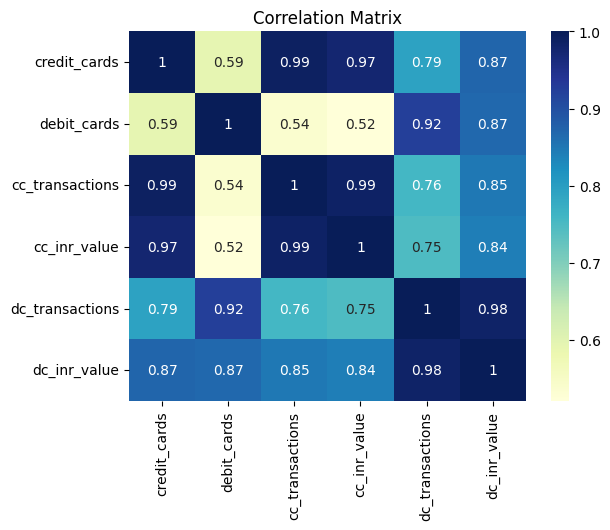

In [52]:
#plot correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that there are strong positive correlations between the following pairs of variables:



*   credit_cards and cc_transactions (0.989889)
*   credit_cards and cc_inr_value (0.974270)
*   dc_transactions and dc_inr_value (0.984834)


This suggests that credit cards and debit cards are positively correlated with credit card transactions and debit card transactions, respectively. This is to be expected, as credit cards and debit cards are both used to make purchases.

Also, the correlations between credit variables and debit variables suggest that there is a strong positive relationship between the two. However, it is important to note here that correlation does not equal causation.


**Checking for outliers :**

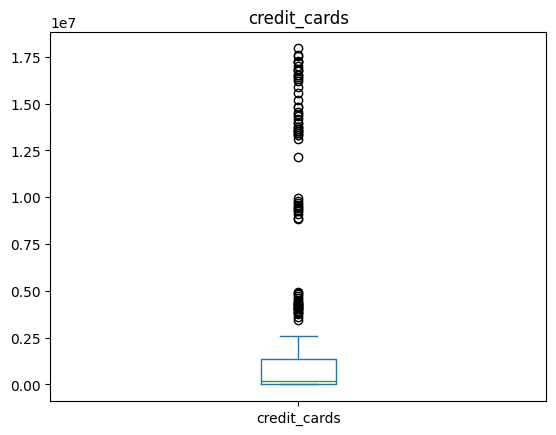

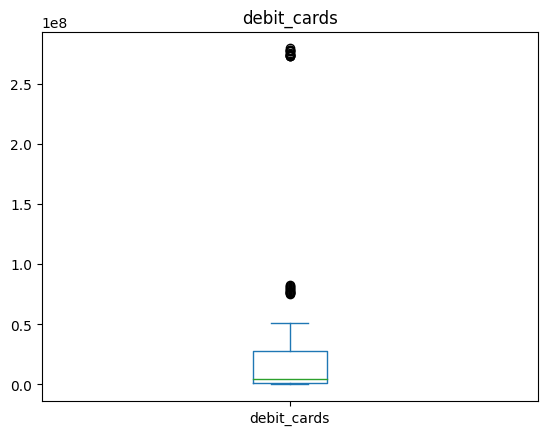

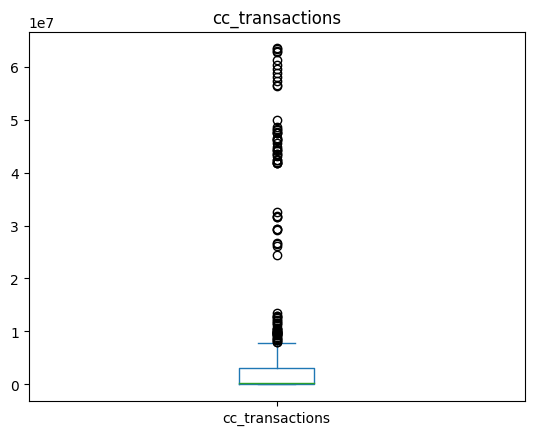

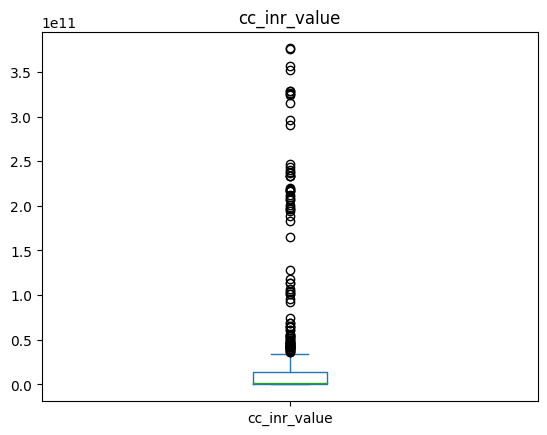

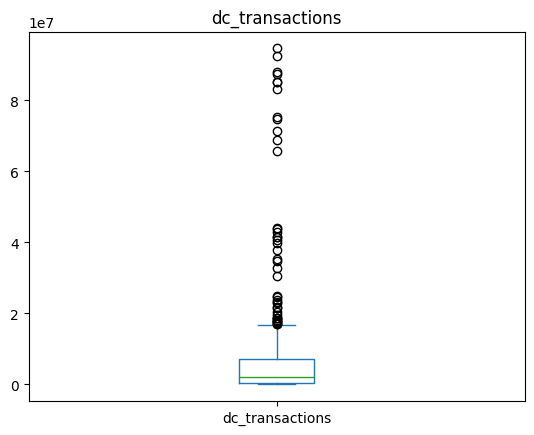

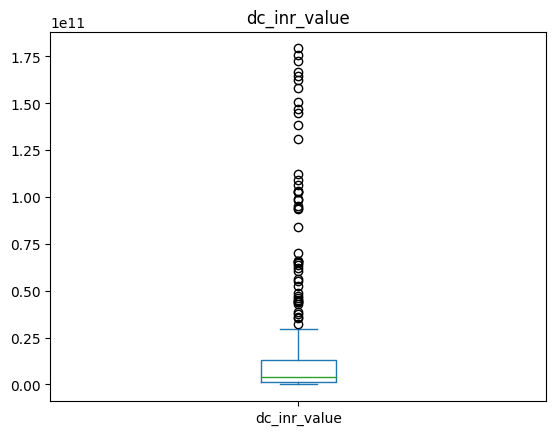

In [50]:
#plot boxplots for the numerical variables
for column in df.select_dtypes(include=['int64', 'float64']):
    fig, ax = plt.subplots()
    df[column].plot.box(ax=ax)
    ax.set_title(column)
    plt.show()